In [67]:
# Run once
%load_ext autoreload
%autoreload 2
%cd ../

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
C:\Users\Marcel\github


In [95]:
import matplotlib.pyplot as plt
import numpy as np
import torch

In [96]:
import src.data.generate_data as gen
from torch.utils.data import DataLoader
import src.odenet.midpoint_method as mpm
import src.odenet.odenet as odenet

In [97]:
# Generate data
train_data = gen.generate_squares(1000)
train = DataLoader(gen.to_dataset(train_data), batch_size=32, shuffle=True)
#test = DataLoader(gen.to_dataset(gen.generate_squares(100)), batch_size=100, shuffle=False)

In [123]:
# Create network
net = mpm.MidPointNetwork(10, 2, max_iter=1)
print(list(net.parameters()))

[Parameter containing:
tensor([[ 0.5406, -0.1062],
        [ 0.1776,  0.2916]], requires_grad=True), Parameter containing:
tensor([-0.6416,  0.6071], requires_grad=True), Parameter containing:
tensor([[-0.0834, -0.3819],
        [ 0.2034, -0.5532]], requires_grad=True), Parameter containing:
tensor([0.4849, 0.0026], requires_grad=True), Parameter containing:
tensor([[ 0.3650,  0.2496],
        [-0.0987,  0.0266]], requires_grad=True), Parameter containing:
tensor([0.1923, 0.1923], requires_grad=True), Parameter containing:
tensor([[ 0.1992,  0.3211],
        [-0.1602,  0.0669]], requires_grad=True), Parameter containing:
tensor([-0.0550, -0.5952], requires_grad=True), Parameter containing:
tensor([[ 0.1316, -0.2605],
        [ 0.2141,  0.5999]], requires_grad=True), Parameter containing:
tensor([-0.0625,  0.3097], requires_grad=True), Parameter containing:
tensor([[-0.6175,  0.1553],
        [ 0.4264,  0.2202]], requires_grad=True), Parameter containing:
tensor([-0.1631,  0.0124], requ

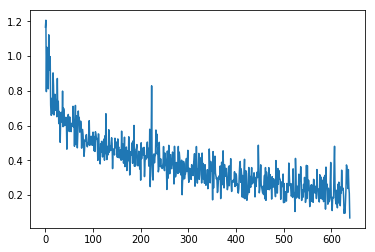

In [124]:
# Train network
results = net.train_network(train, epochs=20)
plt.plot(results)

tensor([[-1.0000, -1.0000],
        [-1.0000, -0.9832],
        [-1.0000, -0.9664],
        ...,
        [ 1.0000,  0.9664],
        [ 1.0000,  0.9832],
        [ 1.0000,  1.0000]])
tensor([[0.8702, 0.1298],
        [0.8730, 0.1270],
        [0.8757, 0.1243],
        ...,
        [0.9845, 0.0155],
        [0.9844, 0.0156],
        [0.9844, 0.0156]])


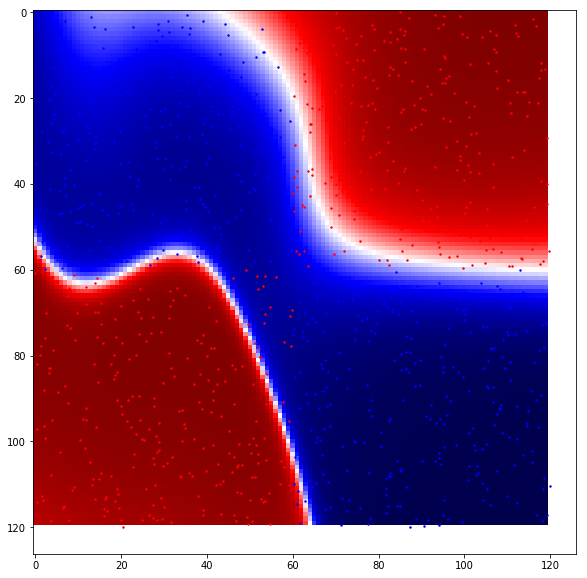

In [128]:
# Make predictions on test data
grid_n = 120
gridpoints = torch.stack(tuple(map(torch.flatten, torch.meshgrid(torch.linspace(-1, 1, grid_n), torch.linspace(-1, 1, grid_n))))).transpose(0, 1)
print(gridpoints)
probs = torch.exp(net.predict(gridpoints))
print(probs)
plt.figure(figsize=(10, 10))
plt.imshow(probs[:, 0].reshape(grid_n, grid_n).flip(dims=(0,)).cpu().numpy(), cmap=plt.get_cmap('seismic'))

red, blue = train_data[0][train_data[1]].cpu(), train_data[0][~train_data[1]].cpu()
plt.scatter((blue[:, 0] + 1) * grid_n / 2, (blue[:, 1] + 1) * grid_n / 2, color='blue', s=2)
plt.scatter((red[:, 0] + 1) * grid_n / 2, (red[:, 1] + 1) * grid_n / 2, color='red', s=2)
plt.show()

In [94]:
list(net.parameters())

[Parameter containing:
 tensor([[ 1.5079,  0.7235],
         [ 0.0755, -0.2710]], requires_grad=True), Parameter containing:
 tensor([ 0.6245, -0.6238], requires_grad=True), Parameter containing:
 tensor([[-0.1372,  0.3727],
         [ 1.1138, -1.8034]], requires_grad=True), Parameter containing:
 tensor([-0.4759, -0.6429], requires_grad=True), Parameter containing:
 tensor([[-1.0224, -1.3061],
         [-0.7203,  0.8418]], requires_grad=True), Parameter containing:
 tensor([ 0.5787, -0.4376], requires_grad=True), Parameter containing:
 tensor([[-0.3753, -0.0017],
         [-0.5250,  0.4287]], requires_grad=True), Parameter containing:
 tensor([-0.3159, -0.4271], requires_grad=True), Parameter containing:
 tensor([[ 0.6100, -0.0584],
         [-0.0074, -0.4078]], requires_grad=True), Parameter containing:
 tensor([ 0.1532, -0.4633], requires_grad=True), Parameter containing:
 tensor([[ 0.9140, -0.5180],
         [-0.3371,  0.5474]], requires_grad=True), Parameter containing:
 tensor([0